In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [311]:
def read_counts2tpm(df):

    result = df
    sample_reads = result.loc[:, result.columns != 'length'].copy()
    gene_len = result.loc[:, ['length']]
    normalize_by_genelength = sample_reads.values / gene_len.values
    scaling_factor = (np.sum(normalize_by_genelength, axis=0).reshape(1, -1))/1e6
    normalize_sequencingdepth = normalize_by_genelength / scaling_factor
    tpm = normalize_sequencingdepth
    return tpm

In [459]:
gene_bed_df = pd.read_csv('../data/results/deseq/allacma_fusca.tsebra.augustus.genes.bed', 
                        sep = '\t', 
                        header = None,
                        names = ['chrom','start','end','Geneid'])
SBG_df = pd.read_csv('../data/results/deseq2/allacma_fusca/v_1/allacma_fusca.DEseq2_results_filtered.tsv', 
                        sep = '\t')
raw_df = pd.read_csv('../data/results/deseq2/allacma_fusca/v_1/allacma_fusca.DEseq2_results_raw.tsv', 
                        sep = '\t')
counts_df = pd.read_csv('../data/results/deseq2/allacma_fusca/v_1/allacma_fusca.DEseq2_counts.tsv',
                        sep = '\t')
pi_df = pd.read_csv('../data/results/gene_pop/full/allacma_fusca.longest_isoforms.pi.tsv',
                        sep = '\t')
pi_df.columns=['chrom','Geneid','0D_pi','4D_pi','0/4D_pi']


In [463]:
pi_df = pi_df.dropna()
pi_df.replace([np.inf, -np.inf], np.nan, inplace=True)
pi_df['linkage'] = np.where((pi_df['chrom'] == 'OX359249.1' ) | (pi_df['chrom'] == 'OX359250.1'),
                            'X', 'autosome')
chrom_pi = pi_df.groupby('chrom')['4D_pi'].mean().reset_index()

In [512]:
AB = [1119221, 983134, 594727, 480592, 154763, 195562]
chrom_pi['length'] = [81897997, 75614292, 66084411, 58810162, 55591601, 48066046]
chrom_pi['callable_length'] = [54030868, 55430720, 54707081, 50199174, 50944876, 41345527]
chrom_pi['het'] = AB/chrom_pi['callable_length']
chrom_pi['0D_pi'] = pi_df.groupby('chrom')['0D_pi'].mean().reset_index()['0D_pi']
chrom_pi

,chrom,4D_pi,length,het,0D_pi,callable_length
0,OX359245.1,0.013894,81897997,0.020714,0.005701,54030868
1,OX359246.1,0.012451,75614292,0.017736,0.004848,55430720
2,OX359247.1,0.009777,66084411,0.010871,0.003886,54707081
3,OX359248.1,0.007721,58810162,0.009574,0.002961,50199174
4,OX359249.1,0.008620,55591601,0.003038,0.004061,50944876
5,OX359250.1,0.010703,48066046,0.004730,0.005310,41345527


/Users/se13/mambaforge/envs/lg_het/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


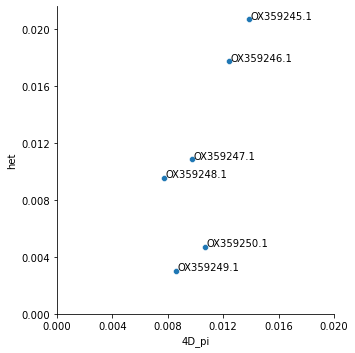

In [513]:
value_tick = np.arange(0, 0.024, 0.004)

g = sns.relplot(data = chrom_pi,
           x = '4D_pi',
           y = 'het')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    ax.set_xticks(ticks=value_tick)
    ax.set_yticks(ticks=value_tick)

    for idx, row in chrom_pi.iterrows():
        x = row['4D_pi']
        y = row['het']
        text = row['chrom']
        ax.text(x+0.0001,y,text, horizontalalignment='left')


/Users/se13/mambaforge/envs/lg_het/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


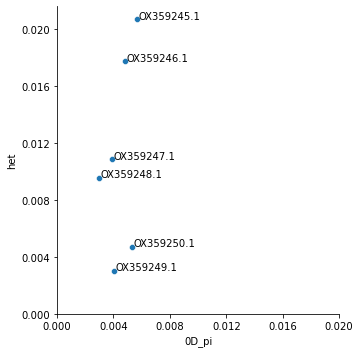

In [515]:
value_tick = np.arange(0, 0.024, 0.004)

g = sns.relplot(data = chrom_pi,
           x = '0D_pi',
           y = 'het')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    ax.set_xticks(ticks=value_tick)
    ax.set_yticks(ticks=value_tick)

    for idx, row in chrom_pi.iterrows():
        x = row['0D_pi']
        y = row['het']
        text = row['chrom']
        ax.text(x+0.0001,y,text, horizontalalignment='left')


/Users/se13/mambaforge/envs/lg_het/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


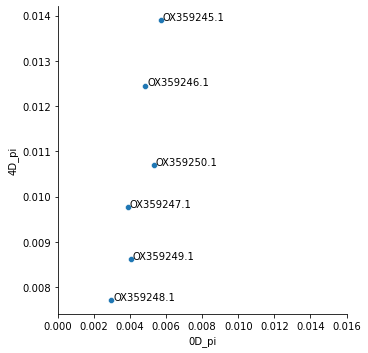

In [536]:
value_tick = np.arange(0, 0.017, 0.002)

g = sns.relplot(data = chrom_pi,
           x = '0D_pi',
           y = '4D_pi')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    ax.set_xticks(ticks=value_tick)
    #ax.set_yticks(ticks=np.arange(0.6, 0.017, 0.02))

    for idx, row in chrom_pi.iterrows():
        x = row['0D_pi']
        y = row['4D_pi']
        text = row['chrom']
        ax.text(x+0.0001,y,text, horizontalalignment='left')


/Users/se13/mambaforge/envs/lg_het/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


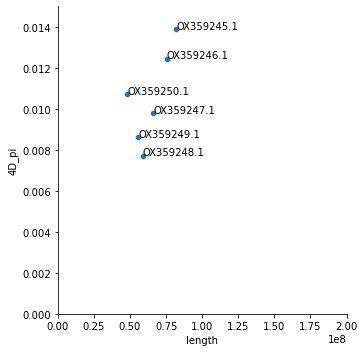

In [524]:
value_tick = np.arange(0, 0.024, 0.004)

g = sns.relplot(data = chrom_pi,
           x = 'length',
           y = '4D_pi')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    #ax.set_xticks(ticks=value_tick)
    #ax.set_yticks(ticks=value_tick)
    ax.set_ylim(0, 0.015)
    ax.set_xlim(0, 20e7)

    for idx, row in chrom_pi.iterrows():
        x = row['length']
        y = row['4D_pi']
        text = row['chrom']
        ax.text(x+0.0001,y,text, horizontalalignment='left')


<Axes: xlabel='chrom', ylabel='4D_pi'>

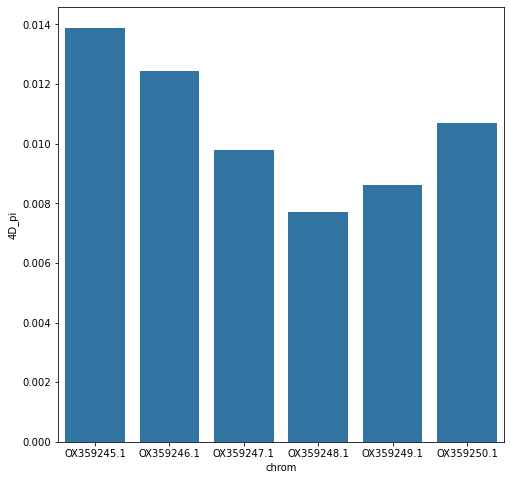

In [516]:
fig, axs = plt.subplots(figsize = (8,8))

sns.barplot(data = chrom_pi,
           x = 'chrom',
           y = '4D_pi',
           color = 'tab:blue')

<Axes: xlabel='chrom', ylabel='het'>

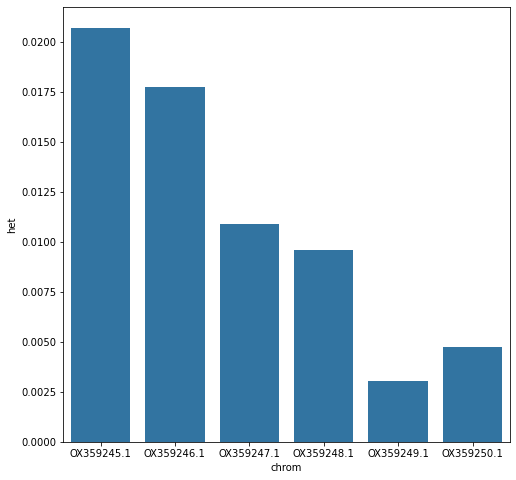

In [517]:
fig, axs = plt.subplots(figsize = (8,8))

sns.barplot(data = chrom_pi,
           x = 'chrom',
           y = 'het',
           color = 'tab:blue')

<Axes: xlabel='chrom', ylabel='0D_pi'>

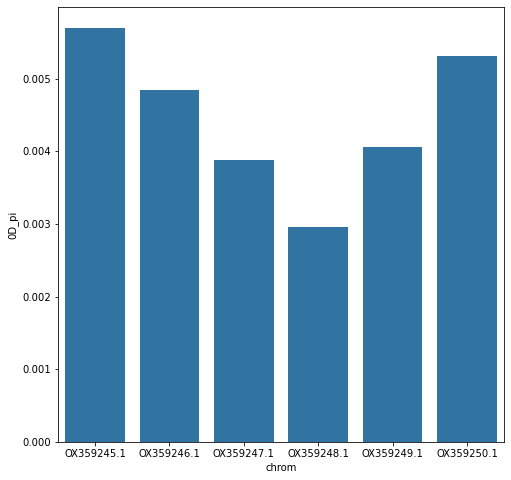

In [518]:
fig, axs = plt.subplots(figsize = (8,8))

sns.barplot(data = chrom_pi,
           x = 'chrom',
           y = '0D_pi',
           color = 'tab:blue')

In [549]:
def ne(theta, mu):
    # theta = 4*Ne*mu
    # Ne = theta / (4*mu)
    return theta / (4*mu)

In [550]:
mu_drosophila = 8.4e-09
mu_heliconius = 2.9e-09
theta = chrom_pi['4D_pi'].mean()
print(ne(theta, mu_drosophila))
print(ne(theta, mu_heliconius))

313324.46941764455
907560.5321062809


In [551]:
(313325 + 907560) / 2

610442.5

In [317]:
pi_df['Geneid'] = [gene.replace('g','g_') for gene in pi_df['Geneid'].to_list()]
pi_df = pi_df[pi_df['Geneid'].isin(Geneid)]
pi_df = pi_df.merge(chrom_df[['Geneid','bias']], how='outer', on = 'Geneid').dropna()

In [318]:
sample_names = ['AF_F_1','AF_F_2','AF_F_3','AF_F_4','AF_F_5','AF_F_6','AF_F_7','AF_F_8','AF_F_9','AF_F_10',
    'AF_M_1','AF_M_2','AF_M_3','AF_M_4','AF_M_5','AF_M_6','AF_M_7','AF_M_8','AF_M_9','AF_M_10']

In [319]:
counts_df['length'] = (gene_bed_df['end'] - gene_bed_df['start'])/1000
Geneid = list(counts_df['Geneid'])
Chrom = list(gene_bed_df['chrom'])
counts_df = counts_df.set_index('Geneid')

In [320]:
normalised_count_df = pd.DataFrame(read_counts2tpm(counts_df))
normalised_count_df.columns = sample_names
normalised_count_df['Geneid'] = Geneid
normalised_count_df['chrom'] = Chrom
normalised_count_df

,AF_F_1,AF_F_2,AF_F_3,AF_F_4,AF_F_5,AF_F_6,AF_F_7,AF_F_8,AF_F_9,AF_F_10,...,AF_M_3,AF_M_4,AF_M_5,AF_M_6,AF_M_7,AF_M_8,AF_M_9,AF_M_10,Geneid,chrom
0,0.834472,0.704063,0.062557,0.041488,3.086613,0.000000,0.000000,0.000000,0.000000,0.0,...,12.743709,13.100929,7.581688,0.000000,0.000000,0.000000,0.0,0.0,g_27516,CAMXBY010000001.1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,g_89,CAMXBY010000002.1
2,0.584695,1.624200,0.496298,1.792003,3.597952,0.000000,0.000000,0.000000,0.000000,0.0,...,6.792169,15.617153,4.631044,13.140533,6.435697,1.359844,0.0,0.0,g_92,CAMXBY010000002.1
3,2.126509,3.588156,5.951807,5.466814,3.095291,1.300597,0.529783,1.089547,1.869153,0.0,...,4.318659,2.249792,5.970156,1.631282,1.878828,2.510156,0.0,0.0,g_94,CAMXBY010000002.1
4,8.606694,14.848901,24.983612,13.906897,12.689933,2.884802,2.065311,3.893539,3.606926,0.0,...,16.257560,13.476103,22.197843,4.133610,6.042660,9.708861,0.0,0.0,g_95,CAMXBY010000002.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.180610,0.490327,0.000000,0.0,0.0,g_4693,OX359250.1
25939,0.000000,0.000000,0.023751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.019555,0.000000,0.000000,0.000000,0.0,0.0,g_4695,OX359250.1
25940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,g_4696,OX359250.1
25941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.046672,0.000000,0.000000,0.000000,0.0,0.0,g_4706,OX359250.1


In [321]:
gene_bed_df = gene_bed_df.merge(SBG_df[['Geneid','log2FoldChange']], 
                                       how = 'outer',
                                       on = 'Geneid')

In [322]:
bias_conditions = [
    (gene_bed_df['log2FoldChange'] > 0),
    (gene_bed_df['log2FoldChange'] < 0)]
bias_outcomes = ['male_biased', 'female_biased']
gene_bed_df['bias'] = np.select(bias_conditions, bias_outcomes, default='unbiased')

In [323]:
chromosomes = ['OX359245.1',
 'OX359246.1',
 'OX359247.1',
 'OX359248.1',
 'OX359249.1',
 'OX359250.1']

chrom_df = gene_bed_df[gene_bed_df['chrom'].isin(chromosomes)]

In [324]:
chrom_df.groupby(['chrom'])['bias'].value_counts()

chrom       bias         
OX359245.1  unbiased         4572
            male_biased       953
            female_biased     425
OX359246.1  unbiased         4455
            male_biased       878
            female_biased     456
OX359247.1  unbiased         3370
            male_biased       901
            female_biased     381
OX359248.1  unbiased         2760
            male_biased       718
            female_biased     354
OX359249.1  unbiased         1793
            male_biased       735
            female_biased     231
OX359250.1  unbiased         1717
            male_biased       861
            female_biased     137
Name: count, dtype: int64

In [325]:
chrom_df.groupby(['chrom'])['bias'].value_counts(normalize='True')

chrom       bias         
OX359245.1  unbiased         0.768403
            male_biased      0.160168
            female_biased    0.071429
OX359246.1  unbiased         0.769563
            male_biased      0.151667
            female_biased    0.078770
OX359247.1  unbiased         0.724420
            male_biased      0.193680
            female_biased    0.081900
OX359248.1  unbiased         0.720251
            male_biased      0.187370
            female_biased    0.092380
OX359249.1  unbiased         0.649873
            male_biased      0.266401
            female_biased    0.083726
OX359250.1  unbiased         0.632413
            male_biased      0.317127
            female_biased    0.050460
Name: proportion, dtype: float64

In [357]:
chrom_df['bias'].value_counts(normalize='True')

bias
unbiased         0.726427
male_biased      0.196365
female_biased    0.077207
Name: proportion, dtype: float64

In [358]:
100-73

27

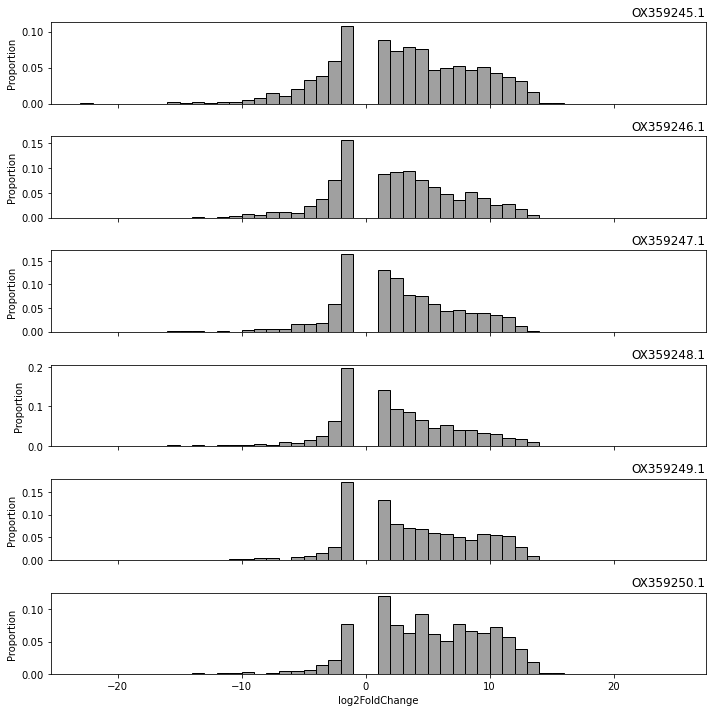

In [326]:
fig, axs = plt.subplots(nrows = 6, sharex=True, figsize = (10,10))

for i, chrom in enumerate(chromosomes):
    
    sns.histplot(chrom_df[chrom_df['chrom']==chrom]['log2FoldChange'],
                color = 'grey',
                stat = 'proportion',
                bins = np.arange(-23, 26, 1),
                ax = axs[i])
    axs[i].set_title(chrom, loc = 'right')
    

plt.tight_layout()

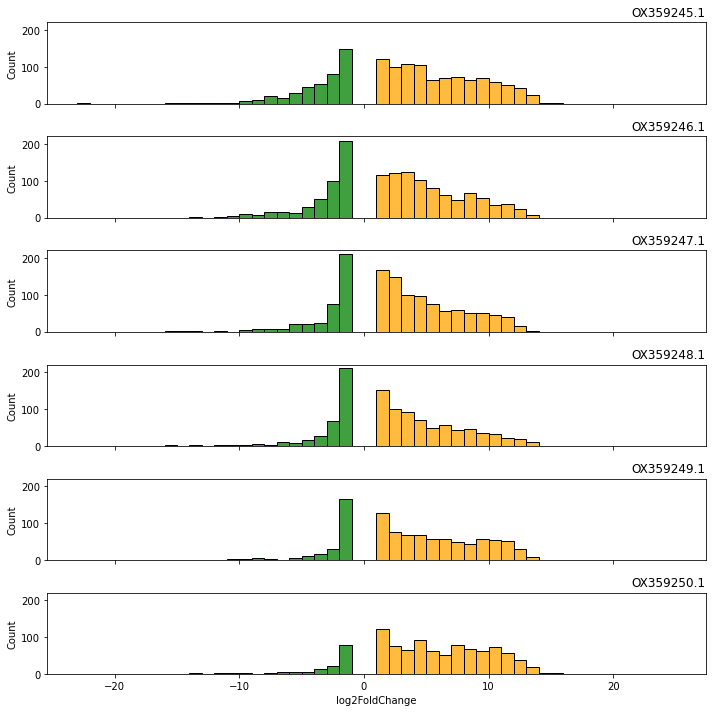

In [327]:
fig, axs = plt.subplots(nrows = 6, sharex=True, figsize = (10,10))

for i, chrom in enumerate(chromosomes):
    
    sns.histplot(chrom_df[(chrom_df['chrom']==chrom) & (chrom_df['log2FoldChange']<=-1)]['log2FoldChange'],
                stat = 'count',
                bins = np.arange(-23, 0, 1),
                color = 'green',
                ax = axs[i])
    axs[i].set_title(chrom, loc = 'right')
    
    sns.histplot(chrom_df[(chrom_df['chrom']==chrom) & (chrom_df['log2FoldChange']>=1)]['log2FoldChange'],
                stat = 'count',
                bins = np.arange(0, 26, 1),
                color = 'orange',
                ax = axs[i])
    
    axs[i].set_title(chrom, loc = 'right')
    axs[i].set_ylim(0, 220)
    

plt.tight_layout()

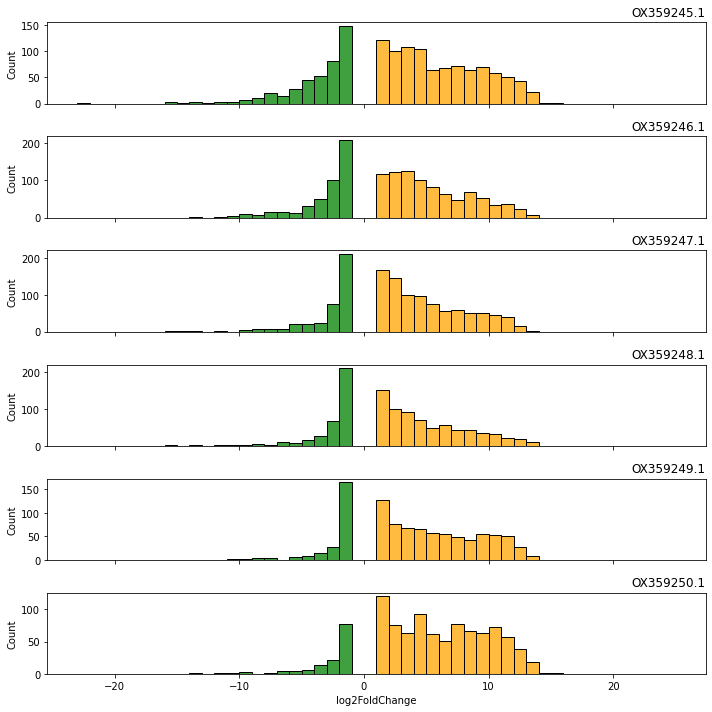

In [328]:
fig, axs = plt.subplots(nrows = 6, sharex=True, figsize = (10,10))

for i, chrom in enumerate(chromosomes):
    
    sns.histplot(chrom_df[(chrom_df['chrom']==chrom) & (chrom_df['log2FoldChange']<=-1)]['log2FoldChange'],
                stat = 'count',
                bins = np.arange(-23, 0, 1),
                color = 'green',
                ax = axs[i])
    axs[i].set_title(chrom, loc = 'right')
    
    sns.histplot(chrom_df[(chrom_df['chrom']==chrom) & (chrom_df['log2FoldChange']>=1)]['log2FoldChange'],
                stat = 'count',
                bins = np.arange(0, 26, 1),
                color = 'orange',
                ax = axs[i])
    
    axs[i].set_title(chrom, loc = 'right')
    #axs[i].set_ylim(0, 220)
    

plt.tight_layout()

In [329]:
barplot_df_count = chrom_df.groupby(['chrom'])['bias'].value_counts().reset_index()
barplot_df_prop = chrom_df.groupby(['chrom'])['bias'].value_counts(normalize='True').reset_index()

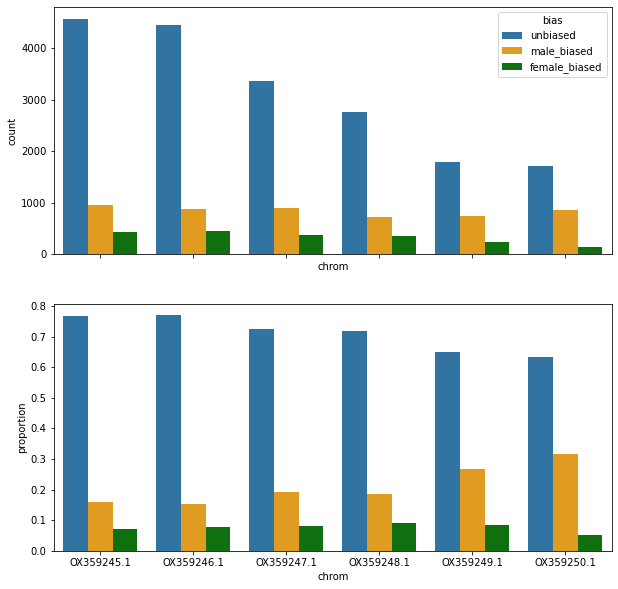

In [330]:
fig, axs = plt.subplots(nrows = 2, sharex=True, figsize = (10,10))

sns.barplot(data=barplot_df_count, 
            x="chrom", 
            y="count",
            hue="bias",
            palette = ['tab:blue','orange','green'],
            ax = axs[0])

sns.barplot(data=barplot_df_prop, 
            x="chrom", 
            y="proportion",
            hue='bias',
            palette = ['tab:blue','orange','green'],
            ax = axs[1])

axs[1].legend().set_visible(False)

In [331]:
ncc_df = normalised_count_df[normalised_count_df['chrom'].isin(chromosomes)]
ncc_ex_df = ncc_df[sample_names].apply(lambda x: [y if y >= 1 else np.nan for y in x])
ncc_ex_df['Geneid'] = ncc_df['Geneid']
ncc_ex_df['chrom'] = ncc_df['chrom']

In [332]:
females = sample_names[0:10]
females.remove('AF_F_5')
males = sample_names[10:]

In [333]:
ncc_ex_df['female_mean_TPM'] = ncc_ex_df[females].mean(axis=1)
ncc_ex_df['male_mean_TPM'] = ncc_ex_df[males].mean(axis=1)

In [334]:
ncc_ex_df[['chrom','AF_F_8']].groupby('chrom').describe()

AF_F_8                                                         \
             count        mean         std       min       25%        50%   
chrom                                                                       
OX359245.1  1561.0   96.994627  581.170568  1.000071  2.963690   8.727039   
OX359246.1  1959.0   72.291549  316.059466  1.007017  3.201191   9.500671   
OX359247.1  2145.0  108.222844  615.160932  1.001513  4.439326  14.053046   
OX359248.1  1960.0  119.692793  632.416137  1.000821  5.569892  16.270263   
OX359249.1  1380.0   85.740418  385.331781  1.000672  6.307896  16.397340   
OX359250.1  1022.0  117.356452  865.906399  1.002067  4.900438  14.108232   

                                     
                  75%           max  
chrom                                
OX359245.1  28.628016  12772.772432  
OX359246.1  29.968147   6042.582837  
OX359247.1  38.179017  18329.498117  
OX359248.1  45.992951  16651.029762  
OX359249.1  40.375424   8066.367889  
OX359250.1  43.561720  19474.533949

In [335]:
ncc_ex_df[['chrom','AF_M_8']].groupby('chrom').describe()

AF_M_8                                                          \
             count        mean          std       min       25%        50%   
chrom                                                                        
OX359245.1  2062.0  108.156765  1067.855909  1.001990  3.352368  10.077584   
OX359246.1  2310.0   59.433833   240.898444  1.000673  3.599400  10.611122   
OX359247.1  2551.0   63.715465   233.566304  1.000370  5.491326  15.091629   
OX359248.1  2258.0   74.764312   295.647451  1.005518  6.405487  16.834160   
OX359249.1  1758.0   60.271328   211.925315  1.000343  7.384808  18.788054   
OX359250.1  1533.0  130.535739  2445.348110  1.006807  6.473349  18.792998   

                                     
                  75%           max  
chrom                                
OX359245.1  32.306144  36497.231636  
OX359246.1  33.244984   5444.360254  
OX359247.1  42.542228   4387.845719  
OX359248.1  45.657075   6741.703313  
OX359249.1  51.248493   6792.018964  
OX359250.1  58.202520  95413.638574

In [336]:
count_matrix = ncc_ex_df.groupby('chrom')[sample_names].mean()
sex_count_matrix = ncc_ex_df.groupby('chrom')[['female_mean_TPM','male_mean_TPM']].mean()

Text(1.0, 1.0, 'TPM mean (for TPM > 1)')

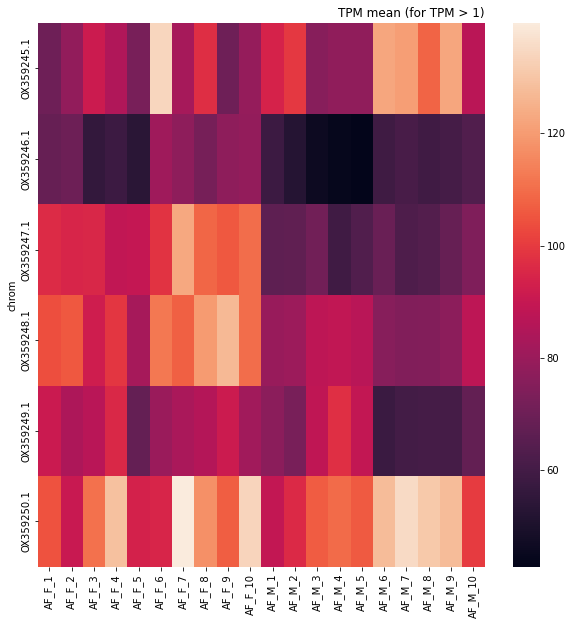

In [337]:
fig, axs = plt.subplots(nrows = 1, figsize = (10,10))

sns.heatmap(data = count_matrix)
axs.set_title('TPM mean (for TPM > 1)', loc = 'right')

Text(1.0, 1.0, 'TPM mean')

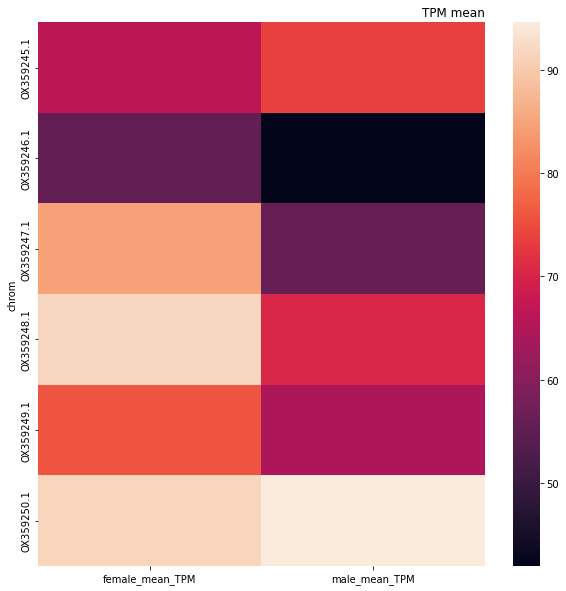

In [338]:
fig, axs = plt.subplots(nrows = 1, figsize = (10,10))

sns.heatmap(data = sex_count_matrix)
axs.set_title('TPM mean', loc = 'right')

In [339]:
print('Female X1/mean(A)')
print(sex_count_matrix['female_mean_TPM'][4]/np.mean(sex_count_matrix['female_mean_TPM'][:4]))
print('Female X2/mean(A)')
print(sex_count_matrix['female_mean_TPM'][5]/np.mean(sex_count_matrix['female_mean_TPM'][:4]))
print('Male X1/mean(A)')
print(sex_count_matrix['male_mean_TPM'][4]/np.mean(sex_count_matrix['male_mean_TPM'][:4]))
print('Male X2/mean(A)')
print(sex_count_matrix['male_mean_TPM'][5]/np.mean(sex_count_matrix['male_mean_TPM'][:4]))

Female X1/mean(A)
1.0167520662717036
Female X2/mean(A)
1.2285253423147737
Male X1/mean(A)
1.0633521258601328
Male X2/mean(A)
1.5612099043509329


In [340]:
female_ratio_matrix = sex_count_matrix['female_mean_TPM'].to_numpy()[:, None]/sex_count_matrix['female_mean_TPM'].to_numpy()[None,:]
male_ratio_matrix = sex_count_matrix['male_mean_TPM'].to_numpy()[:, None]/sex_count_matrix['male_mean_TPM'].to_numpy()[None,:]

Text(1.0, 1.0, 'Ratio')

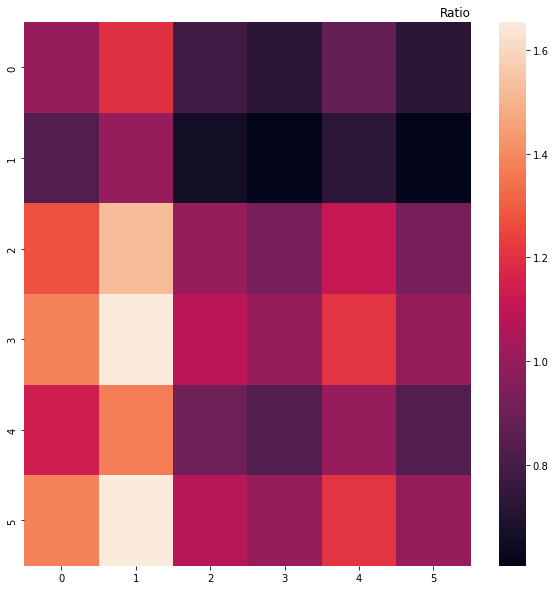

In [341]:
fig, axs = plt.subplots(nrows = 1, figsize = (10,10))

sns.heatmap(data = female_ratio_matrix)
axs.set_title('Ratio', loc = 'right')

Text(1.0, 1.0, 'Ratio')

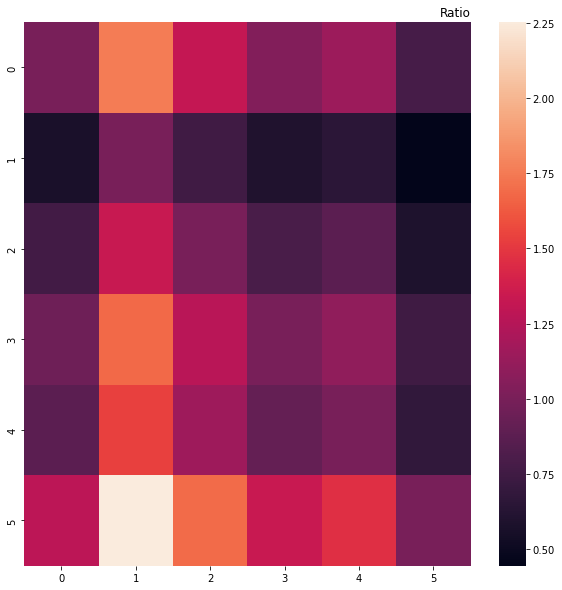

In [342]:
fig, axs = plt.subplots(nrows = 1, figsize = (10,10))

sns.heatmap(data = male_ratio_matrix)
axs.set_title('Ratio', loc = 'right')

<Axes: xlabel='AF_F_1', ylabel='Count'>

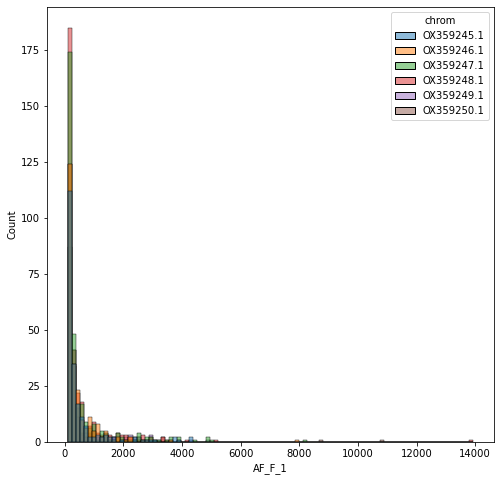

In [343]:
fig, axs = plt.subplots(nrows = 1, figsize = (8,8))

sns.histplot(data = ncc_df[ncc_df['AF_F_1'] > 100],
             x = 'AF_F_1',
             hue = 'chrom',
             bins = 100,
             stat = 'count')

In [344]:
pi_df

,chrom,Geneid,0D_pi,4D_pi,0/4D_pi,linkage,bias
0,OX359245.1,g_33544,0.019374,0.010455,1.853129,autosome,unbiased
1,OX359245.1,g_33549,0.000501,0.000487,1.027850,autosome,unbiased
2,OX359245.1,g_33551,0.001268,0.005283,0.239941,autosome,male_biased
3,OX359245.1,g_33556,0.000921,0.000665,1.385024,autosome,unbiased
4,OX359245.1,g_33557,0.000347,0.010225,0.033888,autosome,unbiased
...,...,...,...,...,...,...,...
11147,OX359250.1,g_4665,0.002774,0.002684,1.033188,X,unbiased
11148,OX359250.1,g_4690,0.010225,0.008239,1.241028,X,unbiased
11149,OX359250.1,g_4691,0.000186,0.000765,0.242762,X,unbiased
11150,OX359250.1,g_4692,0.000494,0.001736,0.284659,X,unbiased


In [345]:
pi_df['0/4D_pi'].describe()

count    11011.000000
mean         0.543740
std          0.789426
min          0.000000
25%          0.170953
50%          0.338040
75%          0.630296
max         15.058803
Name: 0/4D_pi, dtype: float64

<Axes: xlabel='0/4D_pi', ylabel='Count'>

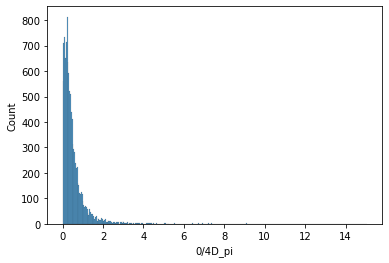

In [346]:
sns.histplot(pi_df['0/4D_pi'])

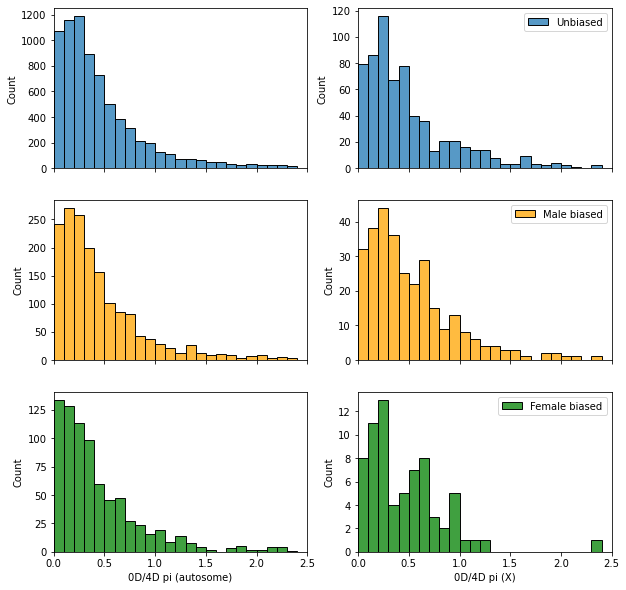

In [411]:
fig, axs = plt.subplots(nrows = 3, ncols=2, figsize = (10,10), sharex=True)

x_upper = 2.5
x_lower = 0
y_upper = 0.2
y_lower = 0
n_bins = 25
bins = np.arange(x_lower,x_upper,(x_upper-x_lower)/n_bins)

stat = 'count'

sns.histplot(data = pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='autosome')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             ax = axs[0][0])

sns.histplot(data = pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='autosome')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             color='orange',
             ax = axs[1][0])

sns.histplot(data = pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='autosome')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             color='green',
             ax = axs[2][0])

sns.histplot(data = pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='X')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             label = 'Unbiased',
             ax = axs[0][1])

sns.histplot(data = pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='X')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             color='orange',
             label = 'Male biased',
             ax = axs[1][1])

sns.histplot(data = pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='X')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             color='green',
             label = 'Female biased',
             ax = axs[2][1])

for i in range(3):
    axs[i][0].set_xlim(x_lower, x_upper)
    axs[i][1].set_xlim(x_lower, x_upper)
    
    #axs[i][0].set_ylim(y_lower, y_upper)
    #axs[i][1].set_ylim(y_lower, y_upper)
    
    axs[i][0].set_xlabel('0D/4D pi (autosome)')
    axs[i][1].set_xlabel('0D/4D pi (X)')
    
    axs[i][1].legend()
    
#plt.xticks(np.arange(x_lower, x_upper, x_upper/7))

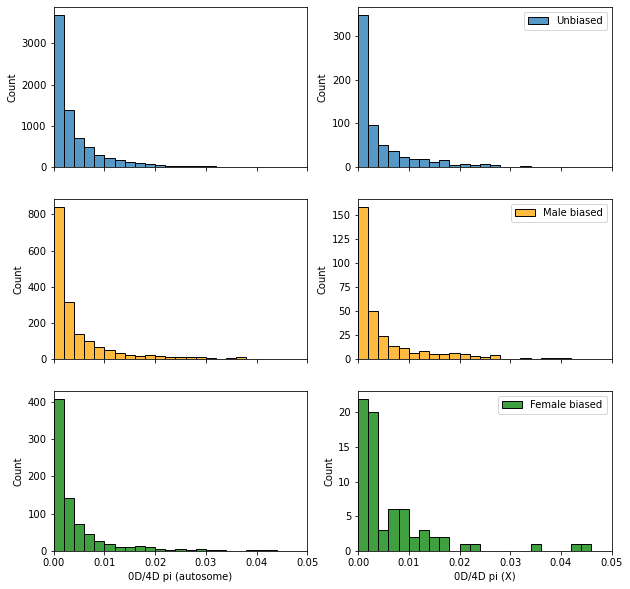

In [416]:
fig, axs = plt.subplots(nrows = 3, ncols=2, figsize = (10,10), sharex=True)

x_upper = 0.05
x_lower = 0
y_upper = 0.2
y_lower = 0
n_bins = 25
bins = np.arange(x_lower,x_upper,(x_upper-x_lower)/n_bins)

stat = 'count'

sns.histplot(data = pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='autosome')],
             x = '0D_pi',
             stat=stat,
             bins=bins,
             ax = axs[0][0])

sns.histplot(data = pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='autosome')],
             x = '0D_pi',
             stat=stat,
             bins=bins,
             color='orange',
             ax = axs[1][0])

sns.histplot(data = pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='autosome')],
             x = '0D_pi',
             stat=stat,
             bins=bins,
             color='green',
             ax = axs[2][0])

sns.histplot(data = pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='X')],
             x = '0D_pi',
             stat=stat,
             bins=bins,
             label = 'Unbiased',
             ax = axs[0][1])

sns.histplot(data = pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='X')],
             x = '0D_pi',
             stat=stat,
             bins=bins,
             color='orange',
             label = 'Male biased',
             ax = axs[1][1])

sns.histplot(data = pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='X')],
             x = '4D_pi',
             stat=stat,
             bins=bins,
             color='green',
             label = 'Female biased',
             ax = axs[2][1])

for i in range(3):
    axs[i][0].set_xlim(x_lower, x_upper)
    axs[i][1].set_xlim(x_lower, x_upper)
    
    #axs[i][0].set_ylim(y_lower, y_upper)
    #axs[i][1].set_ylim(y_lower, y_upper)
    
    axs[i][0].set_xlabel('0D/4D pi (autosome)')
    axs[i][1].set_xlabel('0D/4D pi (X)')
    
    axs[i][1].legend()
    
#plt.xticks(np.arange(x_lower, x_upper, x_upper/7))

In [348]:
pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='autosome')].shape[0]

7521

In [349]:
pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='autosome')].shape[0]

1677

In [350]:
pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='autosome')].shape[0]

785

In [351]:
pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='X')].shape[0]

651

In [352]:
pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='X')].shape[0]

306

In [353]:
pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='X')].shape[0]

71

In [354]:
print(pi_df[pi_df['linkage']=='autosome']['4D_pi'].mean())
print(pi_df[pi_df['chrom']=='OX359249.1']['4D_pi'].describe())
print(pi_df[pi_df['chrom']=='OX359250.1']['4D_pi'].describe())

0.011321439827688311
count    466.000000
mean       0.008754
std        0.015976
min        0.000035
25%        0.001168
50%        0.003298
75%        0.009743
max        0.178744
Name: 4D_pi, dtype: float64
count    562.000000
mean       0.010109
std        0.013737
min        0.000105
25%        0.001552
50%        0.004631
75%        0.011805
max        0.083286
Name: 4D_pi, dtype: float64


<Axes: xlabel='4D_pi', ylabel='Count'>

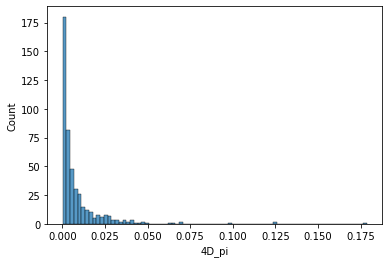

In [355]:
sns.histplot(pi_df[pi_df['chrom']=='OX359249.1']['4D_pi'])

<Axes: xlabel='4D_pi', ylabel='Count'>

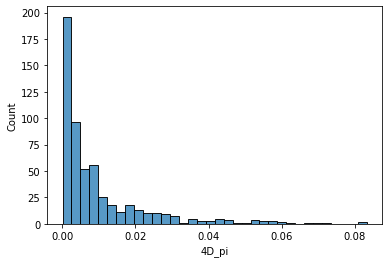

In [356]:
sns.histplot(pi_df[pi_df['chrom']=='OX359250.1']['4D_pi'])

In [373]:
chromosomes

['OX359245.1',
 'OX359246.1',
 'OX359247.1',
 'OX359248.1',
 'OX359249.1',
 'OX359250.1']

(0.0, 0.05)

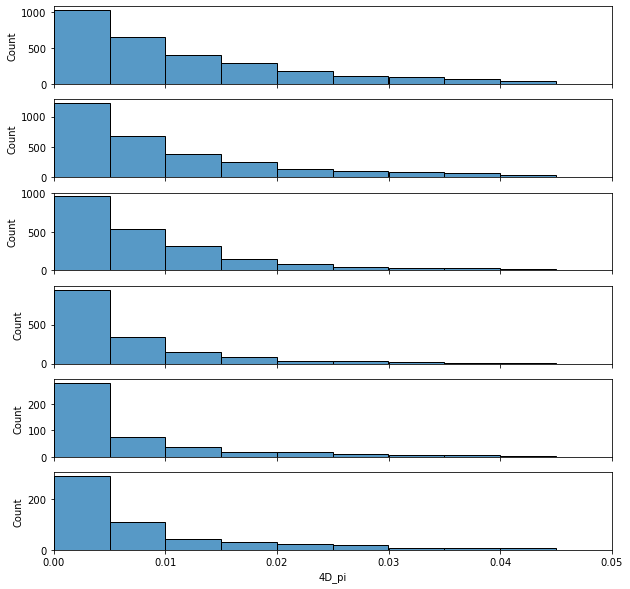

In [399]:
fig, axs = plt.subplots(nrows=6, figsize = (10,10), sharex=True)

bins = np.arange(0, 0.05, 0.005)

for i, chrom in enumerate(chromosomes):
    sns.histplot(pi_df[pi_df['chrom']==chrom]['4D_pi'],
                ax = axs[i],
                bins = bins)
    
axs[5].set_xlim(0, 0.05)

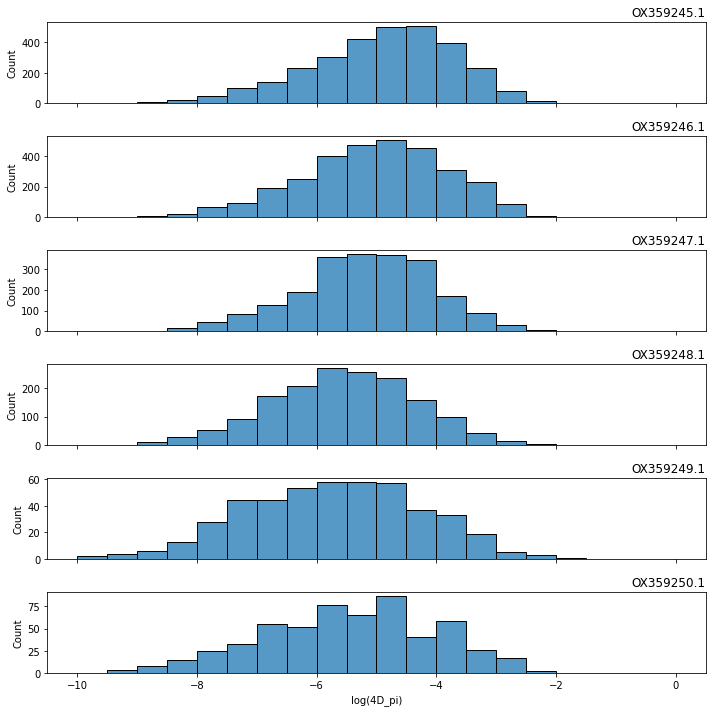

In [405]:
fig, axs = plt.subplots(nrows=6, figsize = (10,10), sharex=True)

bins = np.arange(-10, 0.5, 0.5)

for i, chrom in enumerate(chromosomes):
    sns.histplot(np.log(pi_df[pi_df['chrom']==chrom]['4D_pi']),
                ax = axs[i],
                bins = bins)
    
    axs[i].set_title(chrom, loc = 'right')

axs[5].set_xlabel('log(4D_pi)')

plt.tight_layout()

In [452]:
pi_df['log_4D_pi'] = np.log10(pi_df['4D_pi'])
pi_df['log_0/4D_pi'] = np.log10(pi_df['0/4D_pi'])
pi_df['log_0/4D_pi/0/4D_pi'] = pi_df['log_0/4D_pi']/pi_df['log_4D_pi']
pi_df.replace([np.inf, -np.inf], np.nan, inplace=True)

/Users/se13/mambaforge/envs/lg_het/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [454]:
pi_df['log_0/4D_pi/0/4D_pi'].mean()

0.2453968788881298

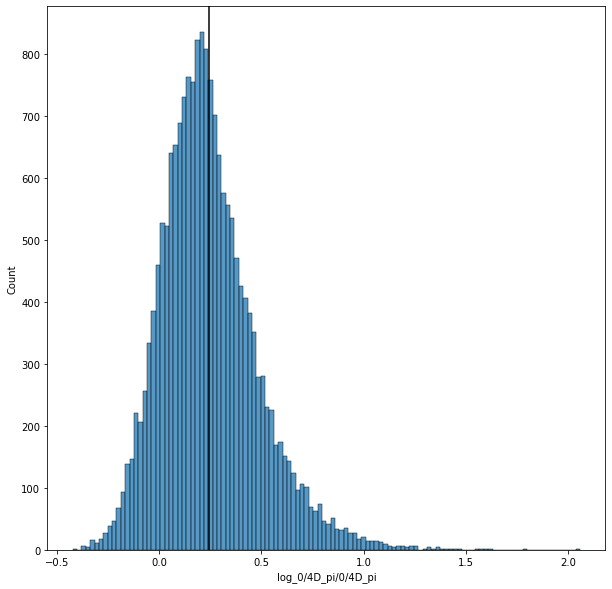

In [458]:
fig, axs = plt.subplots( figsize = (10,10))

sns.histplot(pi_df['log_0/4D_pi/0/4D_pi'])
axs.axvline(x=pi_df['log_0/4D_pi/0/4D_pi'].mean(), color = 'black')
'lower the β value the more skewed the distribution, with many weakly deleterious and only a few very strongly deleterious mutations'